In [6]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
spins = 64
P_plus_sample = 0
field_start = 0.1
field_stop = 5
field_steps = 1000

In [8]:
dos_dir = "C:/Construct/DOS/dos" + str(spins) + "/"
H = np.linspace(field_start, field_stop, field_steps)
P_plus = np.array([])
J_sum = np.array([])
file_count = 0
max_gem_size = 0
arr_of_files = np.array([])
for file in os.listdir(dos_dir):
    file = dos_dir + file
    arr_of_files = np.append(arr_of_files, file)
    N = int(open(file).readlines()[0].rstrip())
    J_sum = np.append(J_sum, int(open(file).readlines()[2].rstrip()))
    P_plus = np.append(P_plus, (2 * N * (N - 1) + J_sum[file_count]) / (4 * N * (N - 1)))
    file_count += 1
idx = P_plus.argsort()
J_sum = J_sum[idx]
P_plus = P_plus[idx]
arr_of_files = arr_of_files[idx]

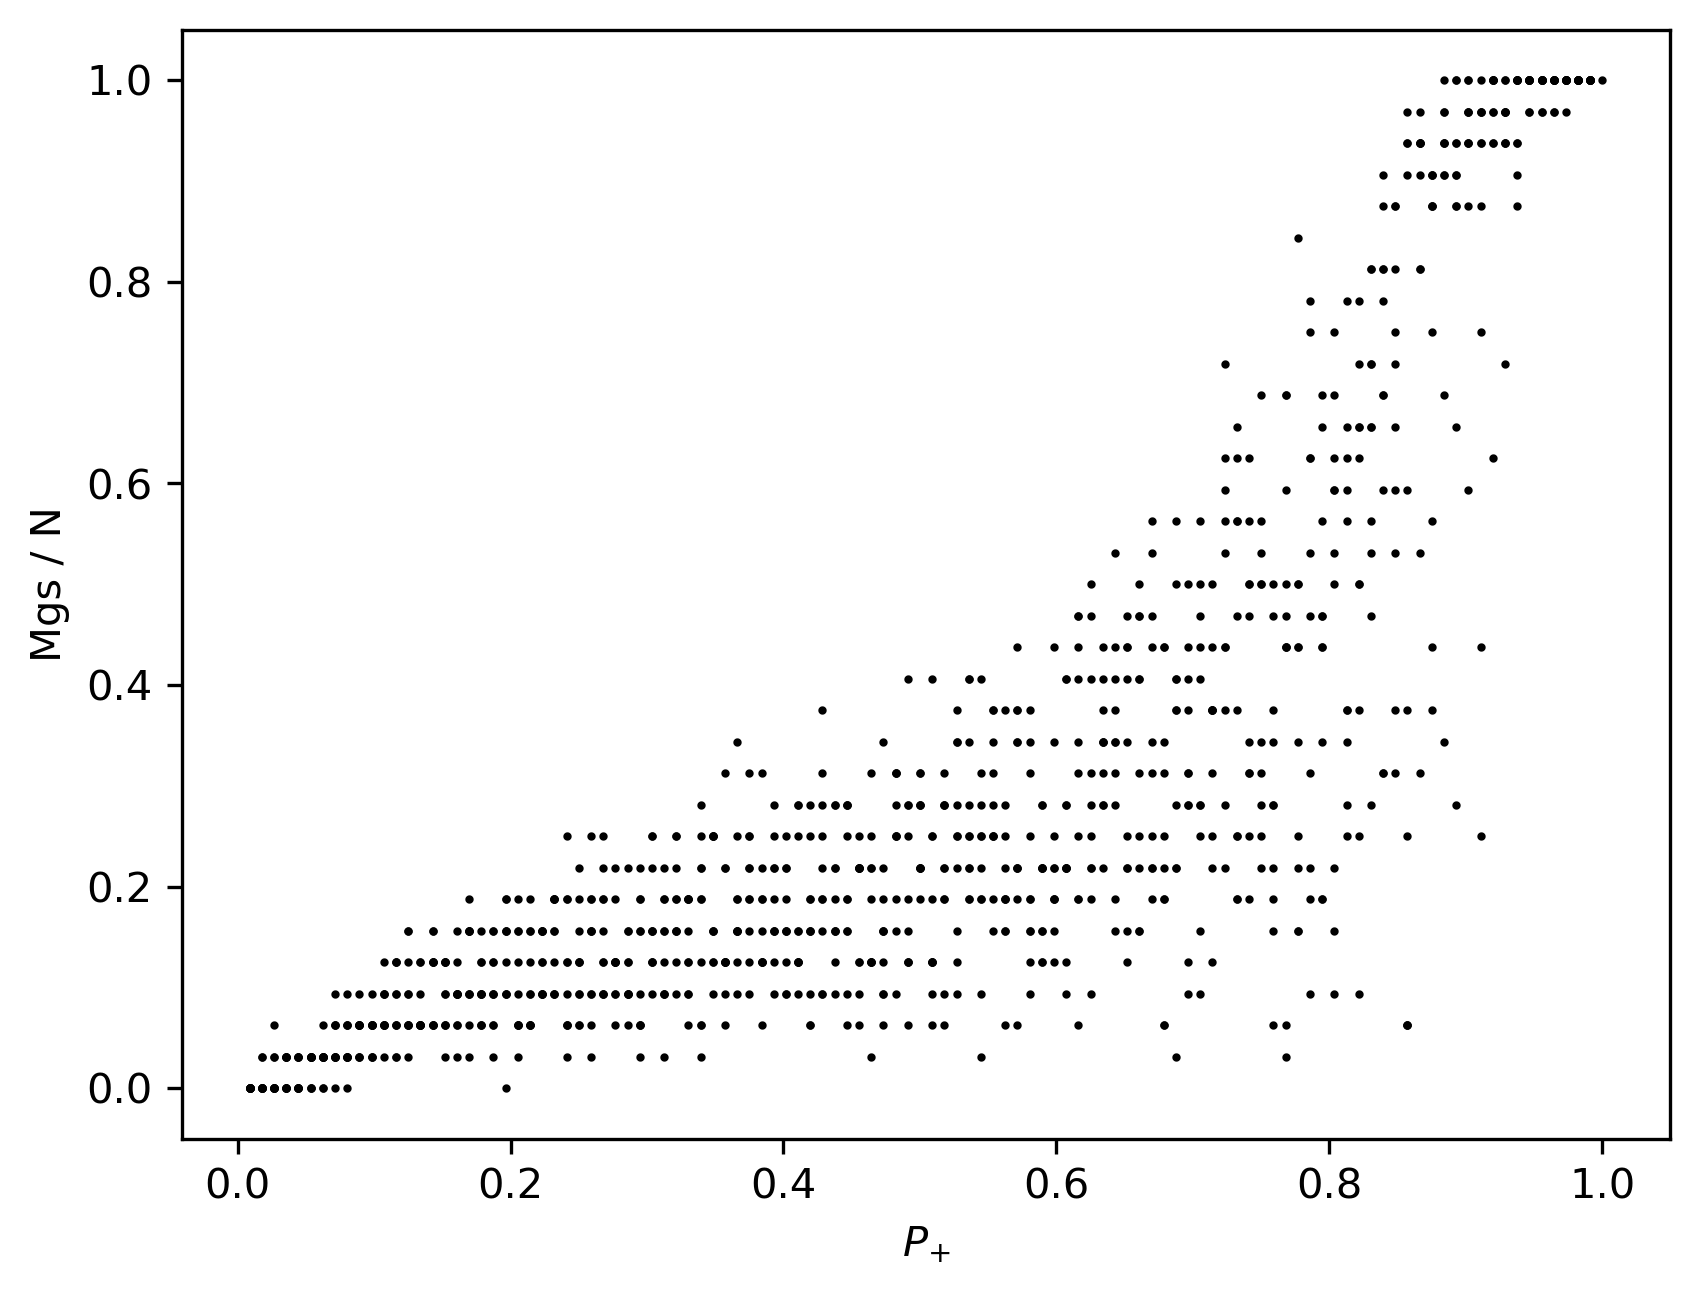

In [9]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x > P_plus_sample]
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    plt.scatter(P_plus[indx], np.max((M[Egs_idx]) / (N * N)), color='black', s=1)
plt.xlabel("$P_{+}$")
plt.ylabel("Mgs / N")
#plt.savefig("../../Mgs(P+).eps", format='eps', dpi=300)
plt.show()

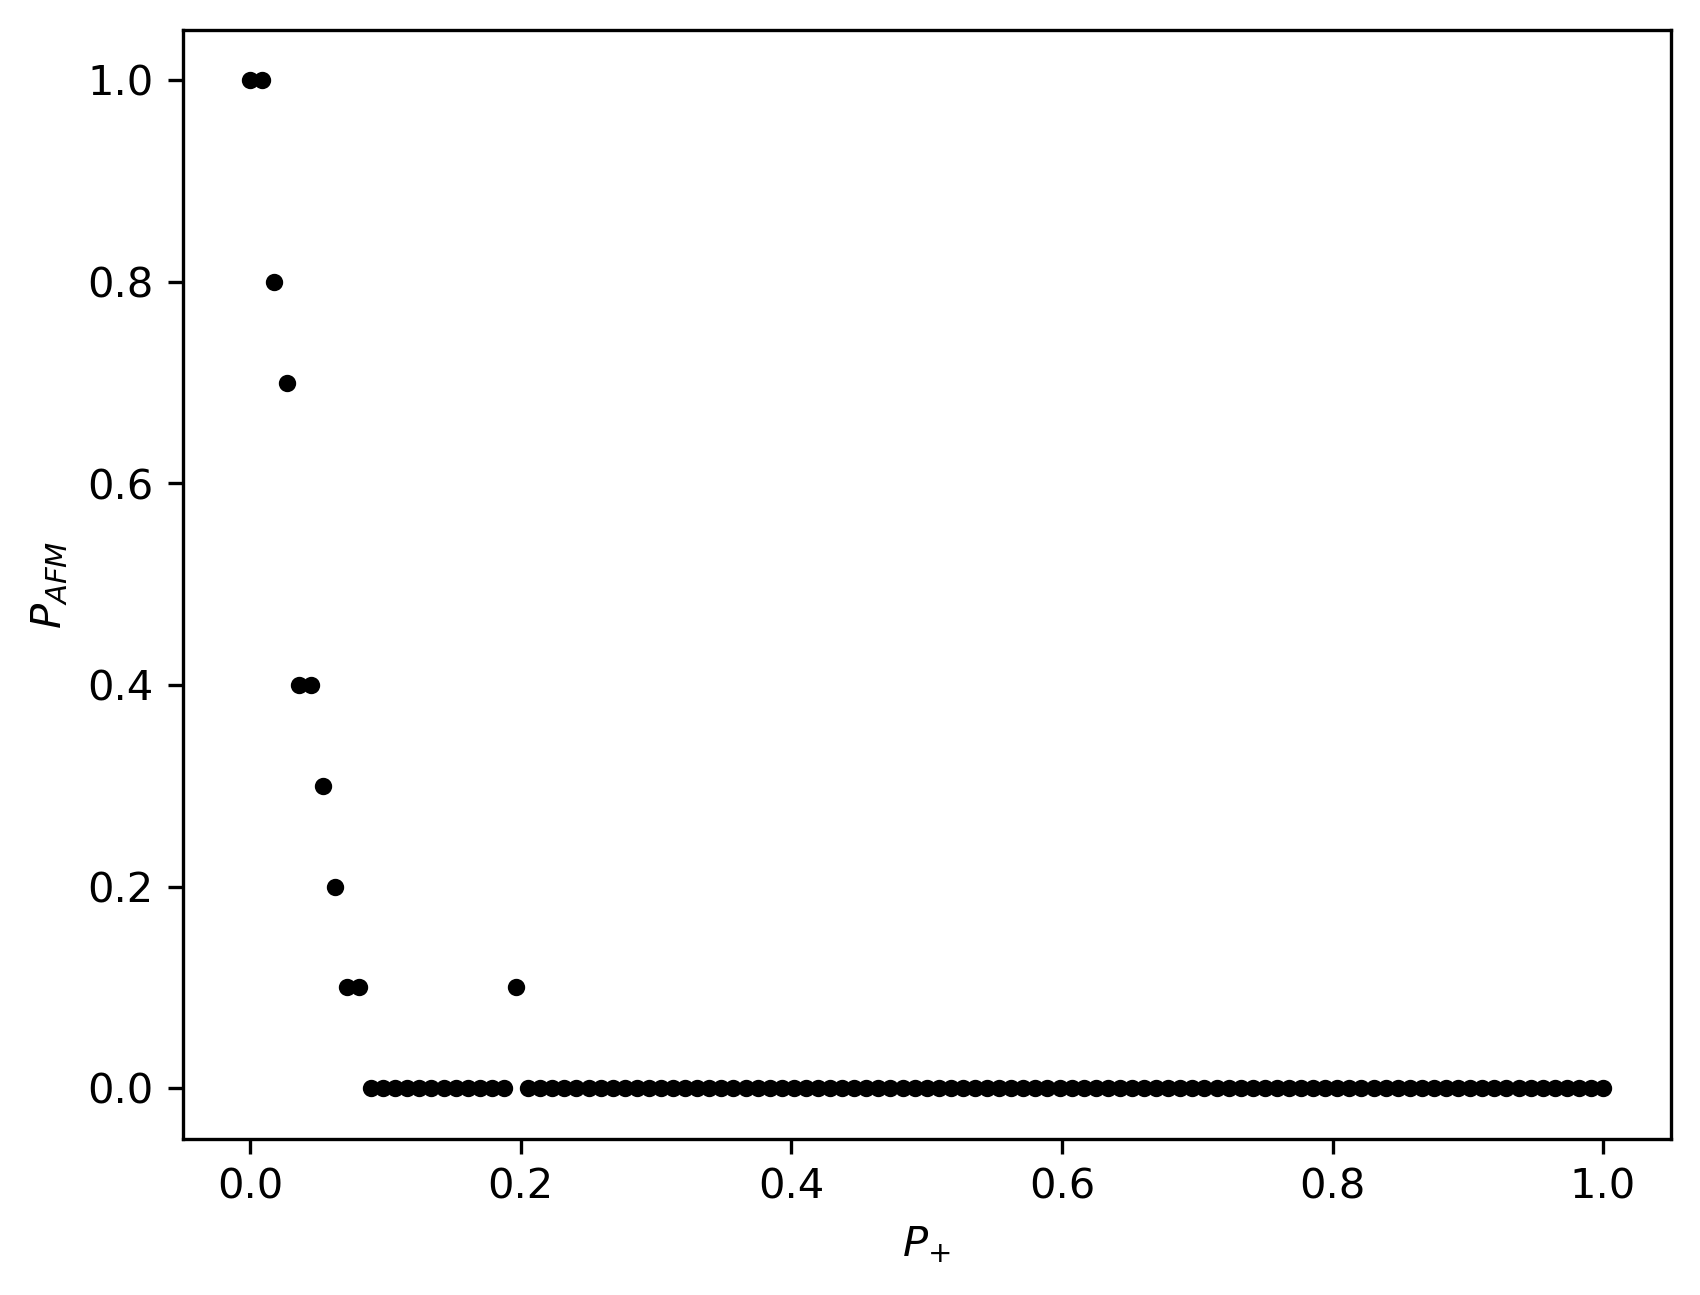

In [16]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
Mgs = []
Ggs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    Mgs.append(np.max((M[Egs_idx]) / (N * N)))
    Ggs.append(G[np.argmax((M[Egs_idx]) / (N * N))])
    #plt.scatter(P_plus[indx], Mgs[indx-1], color='black', s=1)
Mgs = np.array(Mgs)
Ggs = np.array(Ggs)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pMgs = Mgs[mask]
    pGgs = Ggs[mask]
    prob = np.sum(np.bitwise_and(pMgs == 0, pGgs == 2)) / len(pMgs)
    plt.scatter(P_u, prob, color='black', s=10)
plt.xlabel("$P_{+}$")
plt.ylabel("$P_{AFM}$")
#plt.savefig("../../P_AFM_Mmax.eps", format='eps', dpi=300)
plt.show()

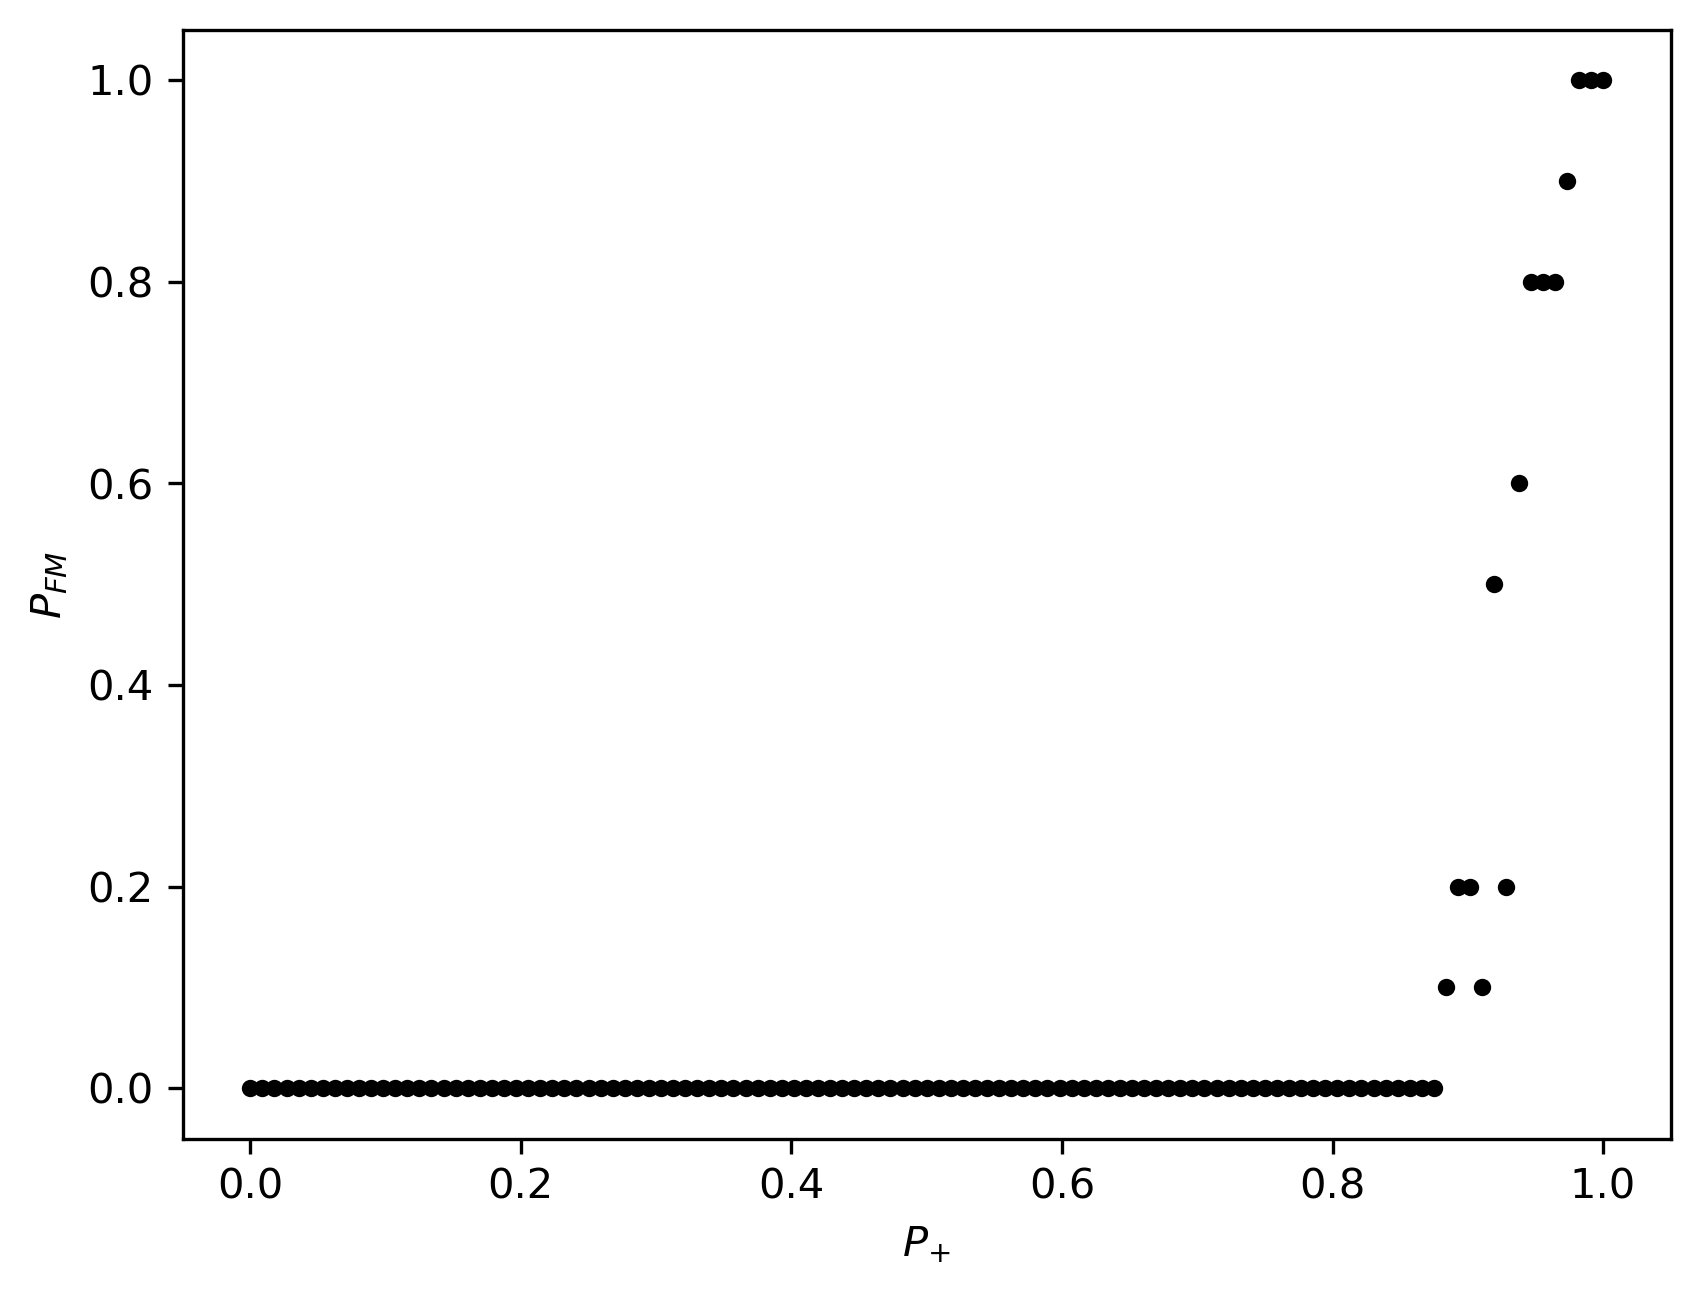

In [ ]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
Mgs = []
Ggs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    Mgs.append(np.max((M[Egs_idx]) / (N * N)))
    Ggs.append(G[np.argmax((M[Egs_idx]) / (N * N))])
    #plt.scatter(P_plus[indx], Mgs[indx-1], color='black', s=1)
Mgs = np.array(Mgs)
Ggs = np.array(Ggs)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pMgs = Mgs[mask]
    pGgs = Ggs[mask]
    prob = np.sum(np.bitwise_and(pMgs == 1, pGgs == 1)) / len(pMgs)
    plt.scatter(P_u, prob, color='black', s=10)
plt.xlabel("$P_{+}$")
plt.ylabel("$P_{FM}$")
#plt.savefig("../../P_FM_Mmax.eps", format='eps', dpi=300)
plt.show()